In [1]:
! pip install git+https://github.com/openai/CLIP.git


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-dg3ksnhp
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-dg3ksnhp
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


In [2]:
import os
import clip
import torch
from torchvision.datasets import Food101

device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the model
model, preprocess = clip.load('ViT-B/32', device)

# Download the dataset
food101 = Food101(root=os.path.expanduser("~/.cache"), download=True)
food101

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 54.1MiB/s]


100%|██████████| 4996278331/4996278331 [03:07<00:00, 26635645.81it/s]


Extracting /root/.cache/food-101.tar.gz to /root/.cache


class name: churros


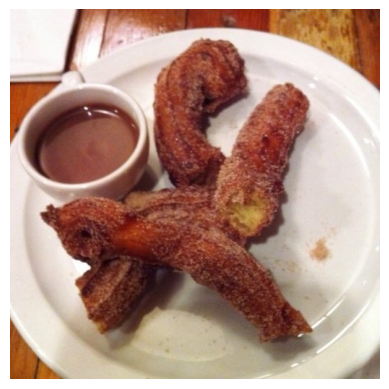

In [6]:
import matplotlib.pyplot as plt
class_names = food101.classes

# Select a random sample from dataset
image, label = food101[0]
class_name = class_names[label]
print('class name:', class_name)

plt.imshow(image)
plt.axis('off')
plt.show()


In [7]:
# prepare the input
image_input = preprocess(image).unsqueeze(0).to(device)
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in food101.classes]).to(device)

# Calculate features
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

In [8]:
# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

In [9]:
# Print the result
print("Top predictions:\n")
for value, index in zip(values, indices):
    print(f"{food101.classes[index]:>16s}: {100 * value.item():.2f}%")

Top predictions:

         churros: 85.06%
        beignets: 6.26%
  fried_calamari: 3.73%
   chicken_wings: 3.28%
    french_toast: 0.50%
